## E2E dataset の読み込み
下記のサイトに置かれている e2e_refined_dataset_v1_0_0.zip を展開し，mr および text を取り出す手順を確認する。

https://github.com/KSKTYM/E2E-refined-dataset/tree/main/release

In [46]:
train_file = "e2e_refined_dataset/e2e_train.json"

import json
with open(train_file, "r") as f:
    js = json.load(f)

In [47]:
len(js)

40560

In [48]:
js[0]['mr']['value']

{'name': 'THE VAULTS',
 'eatType': 'pub',
 'food': '',
 'priceRange': 'more than £30',
 'customer rating': '5 out of 5',
 'area': '',
 'familyFriendly': '',
 'near': 'CAFÉ ADRIATIC'}

In [49]:
js[0]['mr']['order']

{'name': 1,
 'eatType': 2,
 'food': 0,
 'priceRange': 5,
 'customer rating': 4,
 'area': 0,
 'familyFriendly': 0,
 'near': 3}

In [50]:
# (試し打ち) 'order' の値に応じてキーを並べる。ただし，値がゼロの場合を除く
order = js[0]['mr']['order']
sorted_order = sorted(order.items(), key=lambda x:x[1])
print(sorted_order)

new_order = [k for k, v in sorted_order if v != 0]
print(new_order)

[('food', 0), ('area', 0), ('familyFriendly', 0), ('name', 1), ('eatType', 2), ('near', 3), ('customer rating', 4), ('priceRange', 5)]
['name', 'eatType', 'near', 'customer rating', 'priceRange']


In [51]:
# (試し打ち) new_order 内の要素の順番に value を取り出す
value = js[0]['mr']['value']
for attr in new_order:
    print(attr, value[attr])

name THE VAULTS
eatType pub
near CAFÉ ADRIATIC
customer rating 5 out of 5
priceRange more than £30


In [52]:
import json

def load_e2e_data(path):
    mrs = list()
    texts = list()
    
    with open(path, "r") as f:
        js = json.load(f)

        for item in js:
            order = item['mr']['order'] # mr に含まれる属性の順番
            value = item['mr']['value'] # 各属性に対応する値

            # order から順番に応じて属性(attribute / slot) を並べる
            sorted_order = sorted(order.items(), key=lambda x:x[1])
            new_order = [k for k, v in sorted_order if v != 0]

            # seq2seq へ与える形式で mr を構成する
            mr = []
            for attr in new_order:
                mr.append('inform')
                mr.append(attr)
                mr.append(value[attr])

            # seq2seq へ与える形式で text を構成する
            mrs.append(mr)
            texts.append(item['txt'])
            
    return mrs, texts

train_file = "e2e_refined_dataset/e2e_train.json"
mrs, texts = load_e2e_data(train_file)

In [53]:
len(mrs)

40560

min: 3
max: 24
mean: 15.672559171597634


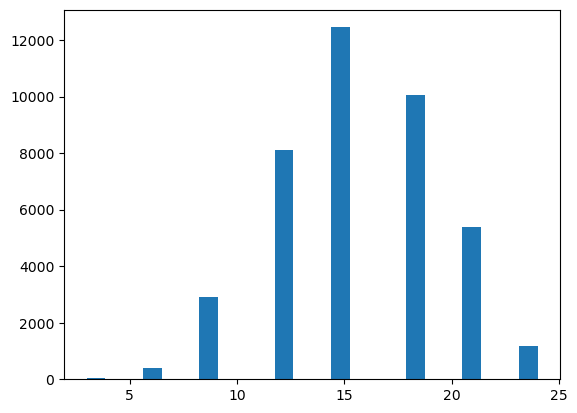

In [54]:
# (参考) 個々の mr の長さを求める
# (注) mr の構成上，長さは「３の倍数」になる。
mr_length = [len(mr) for mr in mrs]

import numpy as np
print("min:", np.min(mr_length))
print("max:", np.max(mr_length))
print("mean:", np.mean(mr_length))

import matplotlib.pyplot as plt
plt.hist(mr_length, bins=24)
plt.show()

In [58]:
texts[:3]

['A coffee shop in the city centre area called BLUE SPICE.',
 'BLUE SPICE is a coffee shop in city centre.',
 'There is a coffee shop BLUE SPICE in the riverside area.']

min: 4
max: 71
mean: 23.91767288693743


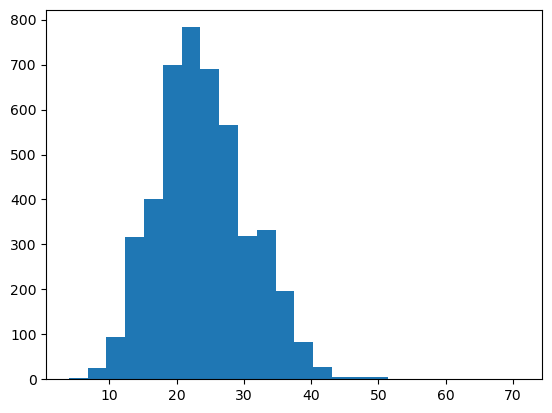

In [61]:
# (参考) 個々の text の長さ(=単語数)を求める
text_length = [len(text.split(' ')) for text in texts]

import numpy as np
print("min:", np.min(text_length))
print("max:", np.max(text_length))
print("mean:", np.mean(text_length))

import matplotlib.pyplot as plt
plt.hist(text_length, bins=24)
plt.show()

In [55]:
# (参考) データの冒頭を眺めてみる
for mr, text in zip(mrs[:3], texts[:3]):
    print("==========")
    print(mr)
    print(text)

['inform', 'name', 'THE VAULTS', 'inform', 'eatType', 'pub', 'inform', 'near', 'CAFÉ ADRIATIC', 'inform', 'customer rating', '5 out of 5', 'inform', 'priceRange', 'more than £30']
THE VAULTS pub near CAFÉ ADRIATIC has a 5 star rating. Prices start at £30.
['inform', 'near', 'CAFÉ BRAZIL', 'inform', 'name', 'THE CAMBRIDGE BLUE', 'inform', 'eatType', 'pub', 'inform', 'priceRange', '£20-25']
Close to CAFÉ BRAZIL, THE CAMBRIDGE BLUE pub serves delicious tuscan beef for the cheap price of £20. Delicious pub food.
['inform', 'name', 'THE EAGLE', 'inform', 'customer rating', 'low', 'inform', 'eatType', 'coffee shop', 'inform', 'near', 'BURGER KING', 'inform', 'area', 'riverside', 'inform', 'familyFriendly', 'yes', 'inform', 'priceRange', 'less than £20', 'inform', 'food', 'Japanese']
THE EAGLE is a low rated coffee shop near BURGER KING and the riverside that is family friendly and is less than £20 for Japanese food.


In [56]:
# (参考) train / valid / test に含まれるデータ数の確認
train_file = "e2e_refined_dataset/e2e_train.json"
mrs, texts = load_e2e_data(train_file)
print("train:", len(mrs))

valid_file = "e2e_refined_dataset/e2e_valid.json"
mrs, texts = load_e2e_data(valid_file)
print("valid:", len(mrs))

test_file = "e2e_refined_dataset/e2e_test.json"
mrs, texts = load_e2e_data(test_file)
print("test:", len(mrs))


train: 40560
valid: 4489
test: 4555


In [67]:
# (メモ) MR 内で利用される単語の種類数が 95 と少ない気がするが，本当かいな？ と確認
train_file = "e2e_refined_dataset/e2e_train.json"
mrs, texts = load_e2e_data(train_file)

words = []
for mr in mrs:
    for item in mr:
        words.append(item)
    
print(len(set(words)))

95
